In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [14]:
d = np.load("../data/training_data/splits.npz", allow_pickle=True)
X_train = d["X_train"]
X_test = d["X_test"]
y_train = d["y_train"]
y_test = d["y_test"]

In [15]:
# Find optimal or best k value (between 1 to 31)
k_values = range(1, 31)
accuracies = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  knn_accuracy = accuracy_score(y_test, y_pred)
  print(f'- Accuracy with k={k} : {knn_accuracy}')
  accuracies.append(knn_accuracy)

# Print best k and best accuracy
best_accuracy = max(accuracies)
best_k = k_values[accuracies.index(best_accuracy)]
print(f'\nBest k value : {best_k}')
print(f'Best accuracy : {best_accuracy}')

- Accuracy with k=1 : 0.99
- Accuracy with k=2 : 0.985625
- Accuracy with k=3 : 0.976875
- Accuracy with k=4 : 0.96875
- Accuracy with k=5 : 0.959375
- Accuracy with k=6 : 0.95625
- Accuracy with k=7 : 0.94625
- Accuracy with k=8 : 0.94125
- Accuracy with k=9 : 0.93125
- Accuracy with k=10 : 0.92625
- Accuracy with k=11 : 0.9225
- Accuracy with k=12 : 0.915625
- Accuracy with k=13 : 0.911875
- Accuracy with k=14 : 0.904375
- Accuracy with k=15 : 0.90125
- Accuracy with k=16 : 0.895
- Accuracy with k=17 : 0.89875
- Accuracy with k=18 : 0.8925
- Accuracy with k=19 : 0.890625
- Accuracy with k=20 : 0.88
- Accuracy with k=21 : 0.881875
- Accuracy with k=22 : 0.875625
- Accuracy with k=23 : 0.878125
- Accuracy with k=24 : 0.878125
- Accuracy with k=25 : 0.874375
- Accuracy with k=26 : 0.87125
- Accuracy with k=27 : 0.87125
- Accuracy with k=28 : 0.866875
- Accuracy with k=29 : 0.863125
- Accuracy with k=30 : 0.8625

Best k value : 1
Best accuracy : 0.99


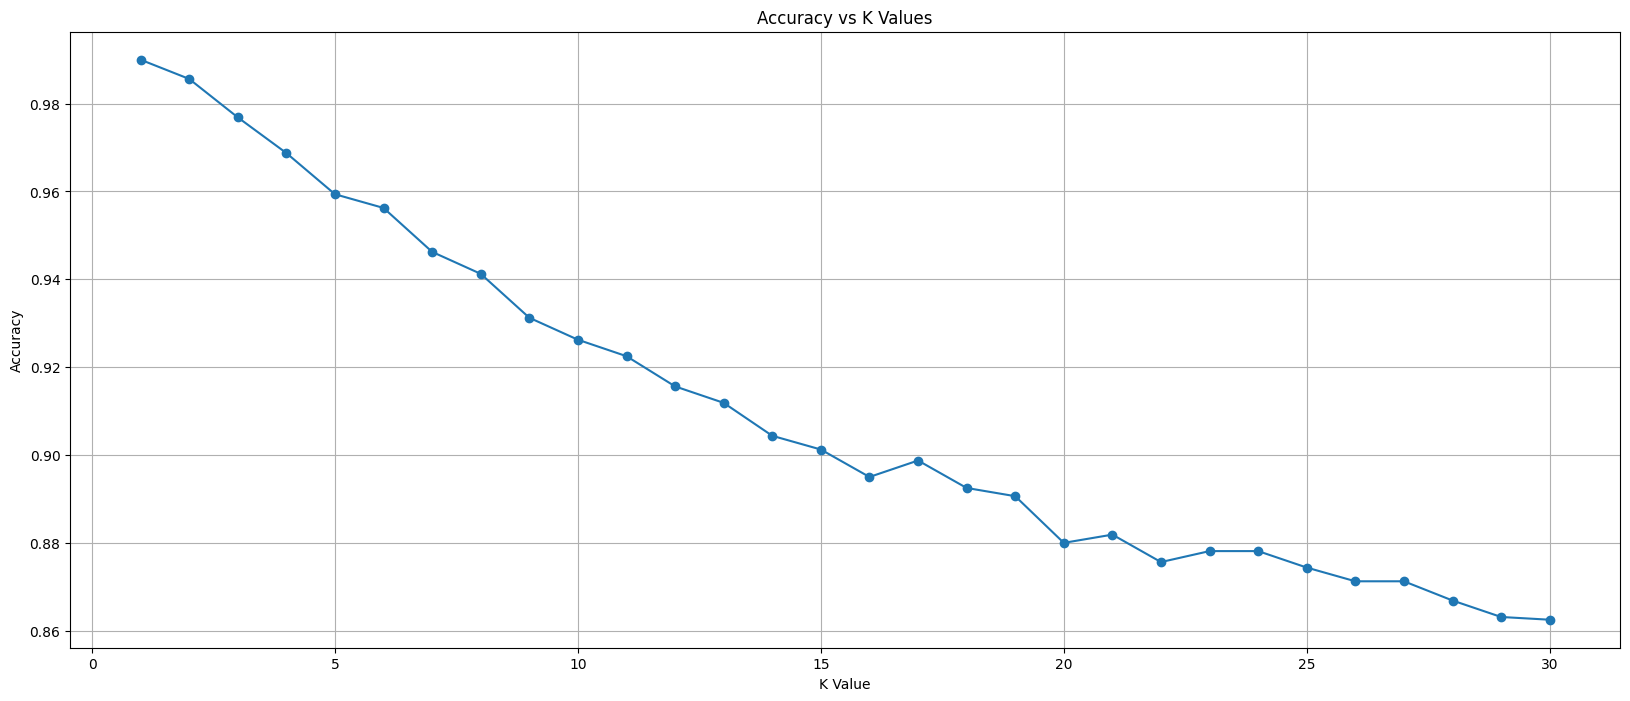

In [16]:
# Plot Accuracies vs K values
plt.figure(figsize=(20, 8))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [17]:
# Train the model with the best k
# Initialize knn model
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the model
knn.fit(X_train, y_train)

# Predict the target
final_y_pred = knn.predict(X_test)

# Evaluation
final_knn_accuracy = accuracy_score(y_test, final_y_pred)
print(f'KNN accuracy with best k : {final_knn_accuracy:.4f}')
print(classification_report(y_test, final_y_pred))

KNN accuracy with best k : 0.9900
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       425
           1       1.00      0.98      0.99       379
           2       0.99      0.99      0.99       397
           3       0.97      1.00      0.98       399

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



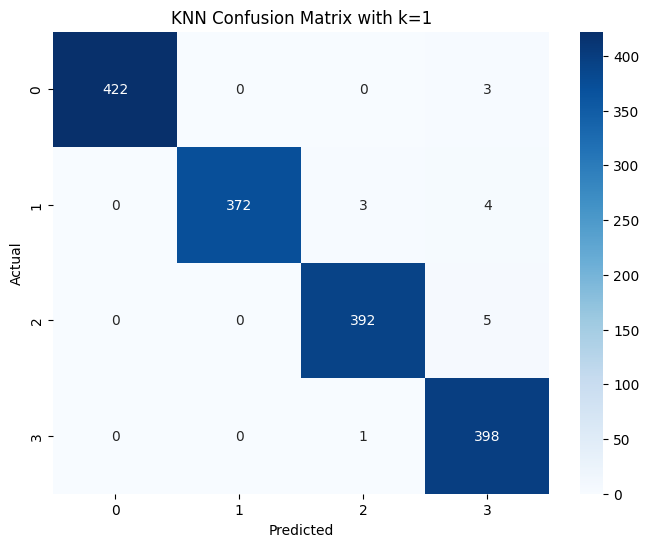

In [18]:
# Create confusion matrix
cm = confusion_matrix(y_test, final_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title(f'KNN Confusion Matrix with k={best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()